# START UP FUNDING ANALYSIS IN INDIA 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 
from bs4 import BeautifulSoup
import lxml
print('Libraries imported.')


import os

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3af7840913194019bc1f686532f47ce0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pmtErhbMlwCS9dBNc9IObNu7TIChxLW9pJC0Bbn9XxD-',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3af7840913194019bc1f686532f47ce0.get_object(Bucket='capstoneassignment1-donotdelete-pr-9xtujbm4gauwha',Key='startup_funding (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
fund_data= pd.read_csv(body)

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.df_data_0 = pd.read_csv(body)
fund_data.head()


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [9]:
fund_data.shape


(2372, 10)

In [13]:
fund_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [14]:
fund_data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [15]:
fund_data.isnull().sum().sort_values(ascending =False)


Remarks             1953
SubVertical          936
AmountInUSD          847
CityLocation         179
IndustryVertical     171
InvestorsName          8
InvestmentType         1
StartupName            0
Date                   0
SNo                    0
dtype: int64

In [16]:
missing = fund_data.isnull().sum().sort_values(ascending=False)
percent = (missing/fund_data.isnull().count())*100
print("Percentage of missing data")
percent


Percentage of missing data


AmountInUSD         35.708263
CityLocation         7.546374
Date                 0.000000
IndustryVertical     7.209106
InvestmentType       0.042159
InvestorsName        0.337268
Remarks             82.335582
SNo                  0.000000
StartupName          0.000000
SubVertical         39.460371
dtype: float64

In [17]:
fund_data.drop(['Remarks'],axis=1,inplace=True)

In [18]:
fund_data['Date']=fund_data['Date'].replace({"12/05.2015":"12/05/2015"})
fund_data['Date']=fund_data['Date'].replace({"13/04.2015":"13/04/2015"})
fund_data['Date']=fund_data['Date'].replace({"15/01.2015":"15/01/2015"})
fund_data['Date']=fund_data['Date'].replace({"22/01//2015":"22/01/2015"})
fund_data['StartupName'] = fund_data['StartupName'].replace({"Flipkart.com":"Flipkart"})
fund_data['IndustryVertical']=fund_data['IndustryVertical'].replace({"ECommerce":"eCommerce"})
fund_data['IndustryVertical']=fund_data['IndustryVertical'].replace({"ecommerce":"eCommerce"})
fund_data['IndustryVertical']=fund_data['IndustryVertical'].replace({"Ecommerce":"eCommerce"})
fund_data['InvestmentType']=fund_data['InvestmentType'].replace({"Crowd funding":"Crowd Funding"})
fund_data['InvestmentType']=fund_data['InvestmentType'].replace({"SeedFunding":"Seed Funding"})
fund_data['InvestmentType']=fund_data['InvestmentType'].replace({"PrivateEquity":"Private Equity"})
fund_data['StartupName']=fund_data['StartupName'].replace({"practo":"Practo"})
fund_data['StartupName']=fund_data['StartupName'].replace({"couponmachine.in":"Couponmachine"})
fund_data['StartupName']=fund_data['StartupName'].replace({"Olacabs":"Ola Cabs"})
fund_data['StartupName']=fund_data['StartupName'].replace({"Ola":"Ola Cabs"})



In [19]:
fund_data['AmountInUSD'] = fund_data['AmountInUSD'].apply(lambda x:float(str(x).replace(",","")))

In [20]:
print("Minimum Investment")
fund_data['AmountInUSD'].min()

Minimum Investment


16000.0

In [21]:
fund_data[fund_data['AmountInUSD']==16000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
2345,2345,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2346,2346,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2347,2347,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2348,2348,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2349,2349,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


In [22]:
print("Maximum Investment")
fund_data['AmountInUSD'].max()


Maximum Investment


1400000000.0

In [23]:
fund_data[fund_data.AmountInUSD == 1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
158,158,18/05/2017,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09


In [24]:
fund_data[fund_data['StartupName'] == "Flipkart"]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
101,101,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
360,360,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07
1976,1976,28/7/2015,Flipkart,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,7.000000e+08
2017,2017,04/06/2015,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07


In [25]:
fund_data[fund_data['StartupName'] == "Paytm"]


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
158,158,18/05/2017,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
821,821,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
1787,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08
2218,2218,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN
2276,2276,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN


In [26]:
fund_data['AmountInUSD'].mean()

12031073.099016393

In [27]:
fund_data['AmountInUSD'].sum()

18347386476.0

In [28]:
fund_data["yearmonth"] = (pd.to_datetime(fund_data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(fund_data['Date'],format='%d/%m/%Y').dt.month)
temp = fund_data['yearmonth'].value_counts().sort_values(ascending = False)
print("Number of funding per month in decreasing order (Funding Wise)\n\n",temp)
year_month = fund_data['yearmonth'].value_counts()


Number of funding per month in decreasing order (Funding Wise)

 201601    104
201602    100
201606     98
201508     98
201507     98
201510     93
201511     92
201512     89
201509     88
201608     87
201506     86
201603     85
201610     80
201604     79
201605     79
201609     73
201612     72
201611     72
201701     72
201704     71
201703     71
201705     68
201706     65
201607     64
201504     63
201505     61
201503     60
201502     55
201501     53
201702     48
201707     43
201708      5
Name: yearmonth, dtype: int64


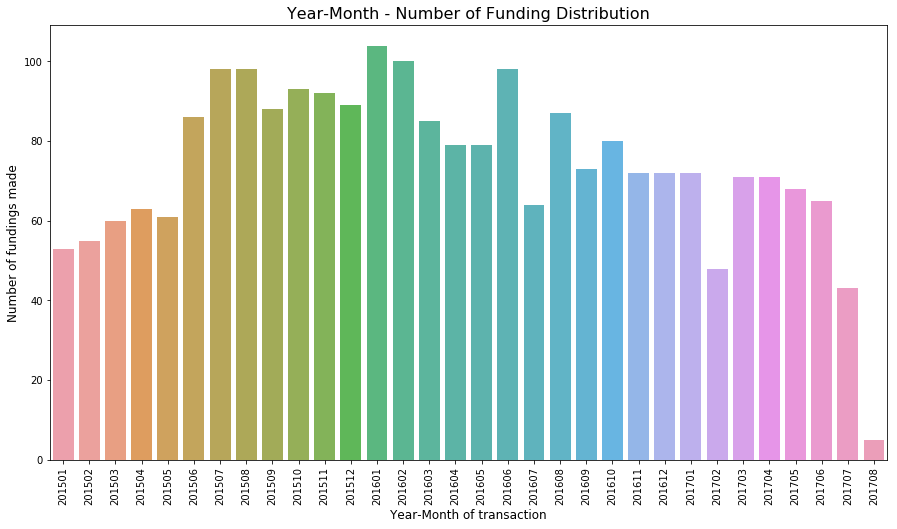

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month - Number of Funding Distribution", fontsize=16)
plt.show()

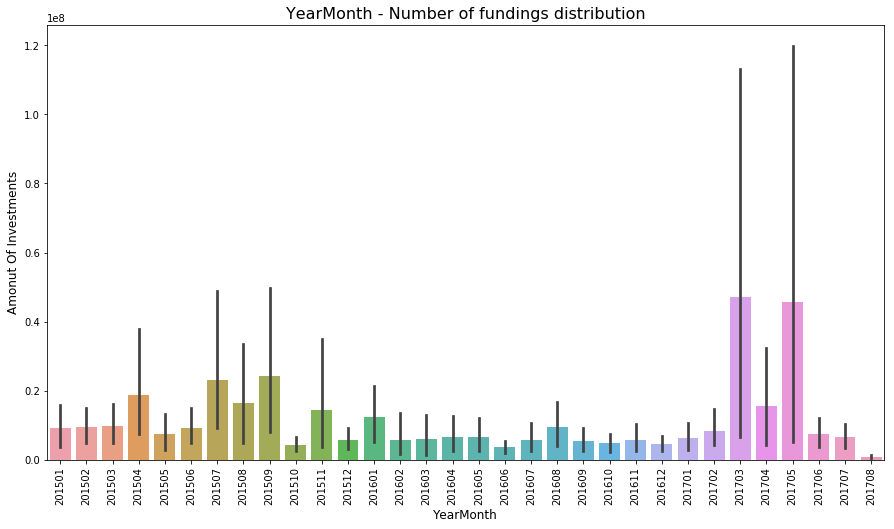

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(fund_data['yearmonth'], fund_data['AmountInUSD'], alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('YearMonth', fontsize=12)
plt.ylabel('Amonut Of Investments', fontsize=12)
plt.title("YearMonth - Number of fundings distribution", fontsize=16)
plt.show()

In [32]:
len(fund_data['StartupName'])

2372

In [33]:
len(fund_data['StartupName'].unique())

1997

In [34]:
tot = (fund_data['StartupName'].value_counts()).values
c=0
for i in tot:
    if i > 1:
        c=c+1
print("Startups that got funding more than 1 times = ",c)

Startups that got funding more than 1 times =  280


In [35]:
fund_count  = fund_data['StartupName'].value_counts()
fund_count = fund_count.head(20)
print(fund_count)


Ola Cabs         9
Swiggy           7
UrbanClap        6
Jugnoo           5
Flipkart         5
NoBroker         5
Paytm            5
Medinfi          5
Wooplr           4
TinyStep         4
Tracxn           4
Niki.ai          4
HolaChef         4
YepMe            4
Byju’s           4
Capital Float    4
Vyomo            4
Voonik           4
Moglix           4
Simplilearn      4
Name: StartupName, dtype: int64


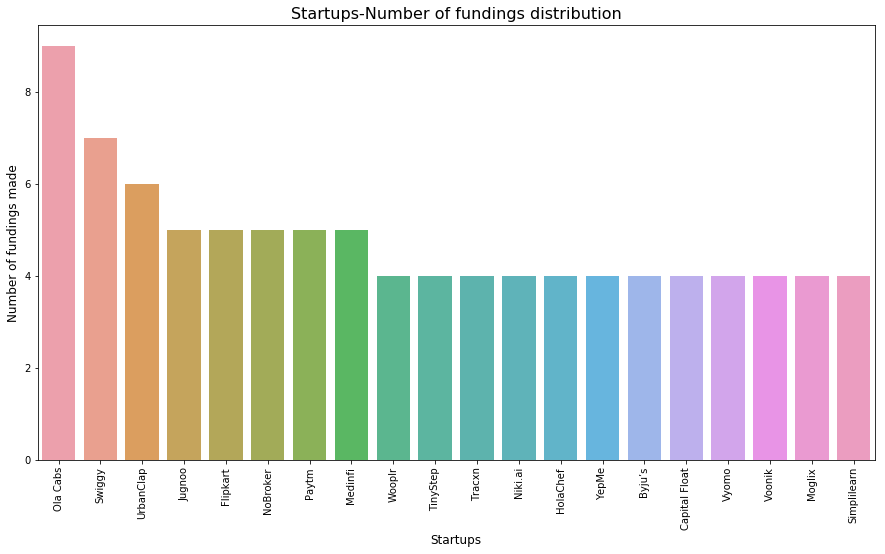

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(fund_count.index, fund_count.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Startups-Number of fundings distribution", fontsize=16)
plt.show()

In [37]:
len(fund_data['IndustryVertical'].unique())

741

In [38]:
IndustryVert = fund_data['IndustryVertical'].value_counts().head(20)
print(IndustryVert)

Consumer Internet                772
Technology                       313
eCommerce                        230
Healthcare                        30
Logistics                         24
Education                         20
Food & Beverage                   19
Finance                            9
Others                             6
Online Education Platform          5
Online Food Delivery               5
Real Estate                        4
Big Data & Analytics platform      3
Food Delivery Platform             3
FMCG                               3
Hyperlocal Handyman Services       3
Logistics Tech                     3
Online Logistics Platform          2
Job Search Platform                2
Customer Engagement Platform       2
Name: IndustryVertical, dtype: int64


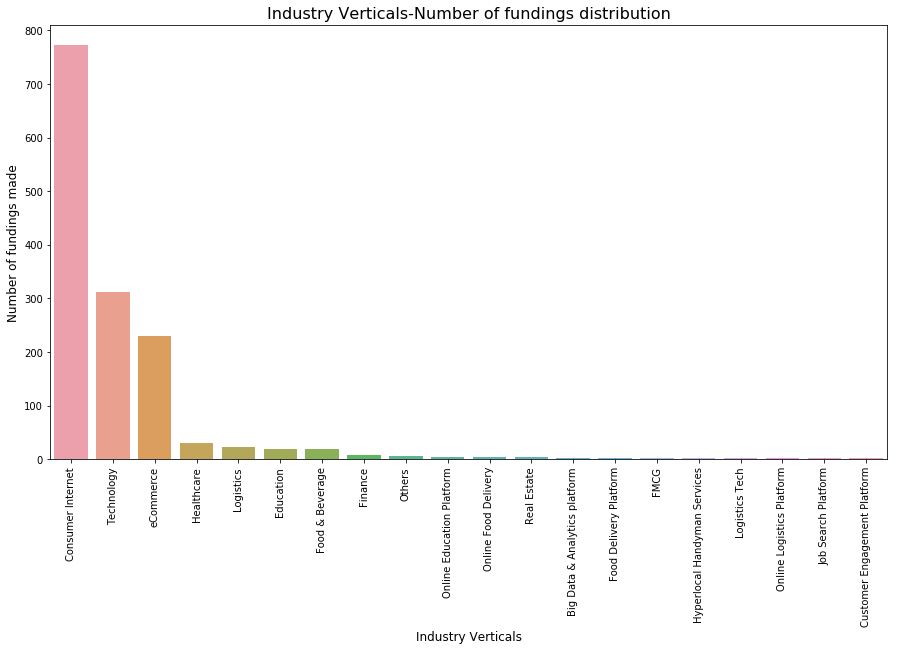

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(IndustryVert.index, IndustryVert.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Industry Verticals', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry Verticals-Number of fundings distribution", fontsize=16)
plt.show()